In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2c-data"

# **Logistic Regression**

Logistic regression is an algorithm that estimates the parameters, or coefficients, of the linear combination
of the logit model. The logistic or logit model is used to predict the probability 'p' of a binary dependent variable taking on one of two possible outcomes. This feature makes Logistic Regression useful even in problems of binary classification

**Exploring the Factors Influencing Electric Vehicle Adoption**

In recent years, the push towards sustainable living and reducing carbon footprints has intensified globally. Among the many initiatives aimed at achieving this, the adoption of electric vehicles (EVs) stands out as a critical measure.Car manufacturers have all been actively promoting the transition from traditional gasoline-powered vehicles to electric ones.

To better understand the dynamics of this transition, a comprehensive study was conducted to explore the factors influencing individuals' decisions to adopt electric vehicles.The dataset aims to provide valuable insights into the key predictors that drive or hinder the adoption of EVs.

**Data Dictionary:** <br>
ID: A unique identifier assigned to each individual in the study

Gender: The gender of the individual, categorized as Male or Female.

Age: The age of the individual in years

Annual Income: The annual income of the individual

Electric Vehicle Adoption: A categorical variable indicating whether the individual owns an electric vehicle (0/1). This is the target variable of the study, helping to identify the proportion of adopters and non-adopters.

In [2]:
df <- read.csv("/kaggle/input/2c-data/2c-data.csv")
head(df)

,ID,Gender,Age,Annual_Income,Electric_Vehicle_Adoption
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


**1)** Fit a logistic regression model to classify the target variable(Electric Vehicle Adoption)<br>
Hint: Use glm()        (3 marks)
​

In [3]:
##Convert categorical variables (Gender)
##Build model

df$Gender_numeric <- as.numeric(factor(df$Gender))

df1 <- df[,c('Gender_numeric','Age','Annual_Income','Electric_Vehicle_Adoption')]

model <- glm(Electric_Vehicle_Adoption ~ ., data = df1, family = binomial)

summary(model)


Call:
glm(formula = Electric_Vehicle_Adoption ~ ., family = binomial, 
    data = df1)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.312e+01  1.472e+00  -8.910  < 2e-16 ***
Gender_numeric  3.338e-01  3.052e-01   1.094    0.274    
Age             2.370e-01  2.638e-02   8.984  < 2e-16 ***
Annual_Income   3.644e-05  5.473e-06   6.659 2.77e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 521.57  on 399  degrees of freedom
Residual deviance: 275.84  on 396  degrees of freedom
AIC: 283.84

Number of Fisher Scoring iterations: 6


**2)** What can u interpret from the summary of the model?         (2 marks)

From the summary we can see that Gender is not a significant variable to determine Electric_Vehicle_Adoption. Only age and Annual_Income variables are significant. 

**3)** Plot the ROC curve and find the AUC value            (3 marks)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC Value:  0.927389730891676"


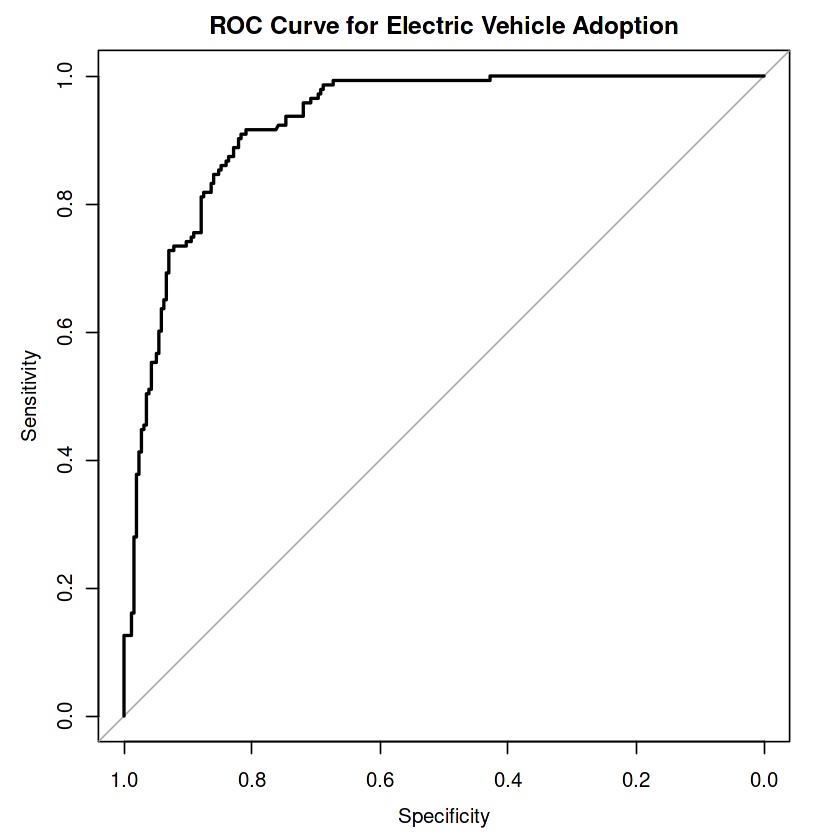

In [4]:
library(pROC)

predicted_probabilities <- predict(model, type = "response")

roc_curve <- roc(df1$Electric_Vehicle_Adoption, predicted_probabilities)

plot(roc_curve, main = "ROC Curve for Electric Vehicle Adoption")

auc_value <- auc(roc_curve)

print(paste("AUC Value: ", auc_value))

**4)** What can you interpret from the ROC curve and AUC value?    (2 marks)

From the ROC curve and the AUC value of 0.927, the following observations can be made :-

1. ROC Curve :-

The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.

A curve that bows towards the top left corner of the plot indicates a good performance of the classifier.

The current model shows a strong ability to distinguish between the classes, as the curve is closer to the top left corner, indicating high sensitivity and specificity.

2. AUC Value (0.927) :-

The AUC value represents the area under the ROC curve, which provides overall performance of the classifier.

An AUC value of 0.927 is excellent, meaning the model has a strong ability to differentiate between the two classes.
